# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"./example_training_matrix_s7.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Columns: 694 entries, lag1_mean_0 to Label
dtypes: float64(694)
memory usage: 7.0 MB


In [3]:
data.shape

(1325, 694)

In [4]:
data.head()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0     0.117921     0.206164    -0.093967            0.469631   
1    -0.082265    -0.049256     0.044805           -0.093592   
2    -0.090863    -0.122952    -0.007356            9.758645   
3     0.187959     0.019425    -0.029316           -0.986802   
4     0.702780     0.048533    -0.154630            2.155975   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.497295            0.131660        0.326577       -0.330473   
1            0.127361           -0.629870       -0.560420       -0.220757   
2            0.366121            0.527875       -5.308649        0.395918   
3           -0.372756            0.372768        1.437476        0.330745   
4           -0.173607            0.209072        0.145057       -0.069918   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  freq_669_2  freq_679_2  freq_689_2  \
0        0.162718       -0.548697  ...    0.002630    0.002573    0.002518   
1        0.329977        0.475668  ...    0.001010    0.000978    0.000949   
2       -0.692405       -4.640629  ...    0.007143    0.006992    0.006848   
3       -0.491346       -0.054859  ...    0.001957    0.001920    0.001885   
4       -0.698760       -0.881781  ...    0.000151    0.000145    0.000139   

   freq_699_2  freq_709_2  freq_720_2  freq_730_2  freq_740_2  freq_750_2  \
0    0.002466    0.002417    0.002370    0.002325    0.002281    0.002240   
1    0.000921    0.000894    0.000869    0.000846    0.000823    0.000802   
2    0.006712    0.006581    0.006457    0.006338    0.006224    0.006115   
3    0.001852    0.001819    0.001788    0.001759    0.001730    0.001702   
4    0.000134    0.000129    0.000124    0.000119    0.000115    0.000111   

   Label  
0    2.0  
1    2.0  
2    0.0  
3    2.0  
4    2.0  

[5 rows x 694 columns]

In [5]:
data.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000         1325.000000   
mean      0.004946    -0.001946     0.000223            0.146696   
std       1.156109     0.363036     0.179225            4.693011   
min      -4.927403    -2.365541    -0.798709          -27.347377   
25%      -0.370993    -0.133702    -0.077236           -1.203076   
50%       0.004317     0.003567     0.003035            0.036049   
75%       0.338374     0.134743     0.079859            1.427880   
max       7.818998     1.836446     0.876090           31.655759   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
count         1325.000000         1325.000000     1325.000000     1325.000000   
mean             0.033770           -0.033195        0.180458       -0.057072   
std              1.286804            0.727813        5.960870        1.446237   
min             -8.277829           -5.139773      -61.482617      -10.787886   
25%             -0.416242           -0.326085       -1.223896       -0.541989   
50%              0.009939           -0.035411        0.033145        0.006629   
75%              0.432508            0.269702        1.454820        0.501038   
max             11.881526            4.053150       45.915924        9.535061   

       lag1_mean_q1_2  lag1_mean_q2_0  ...    freq_669_2    freq_679_2  \
count     1325.000000     1325.000000  ...  1.325000e+03  1.325000e+03   
mean         0.018817       -0.310714  ...  1.383401e-03  1.348708e-03   
std          0.718601        5.944602  ...  1.105437e-03  1.080781e-03   
min         -3.859417      -45.762791  ...  1.655023e-18  5.337288e-18   
25%         -0.291700       -1.729773  ...  5.909993e-04  5.716113e-04   
50%          0.029246       -0.054859  ...  1.088285e-03  1.063403e-03   
75%          0.355671        1.368066  ...  1.843211e-03  1.807090e-03   
max          4.676686       45.022582  ...  7.330343e-03  7.169509e-03   

         freq_689_2    freq_699_2    freq_709_2    freq_720_2    freq_730_2  \
count  1.325000e+03  1.325000e+03  1.325000e+03  1.325000e+03  1.325000e+03   
mean   1.315819e-03  1.284599e-03  1.254924e-03  1.226684e-03  1.199778e-03   
std    1.057421e-03  1.035254e-03  1.014189e-03  9.941438e-04  9.750446e-04   
min    7.289619e-18  9.004297e-18  1.132814e-17  9.142035e-18  2.272269e-17   
25%    5.509949e-04  5.384011e-04  5.260905e-04  5.100259e-04  4.990405e-04   
50%    1.042160e-03  1.005026e-03  9.781197e-04  9.571524e-04  9.372011e-04   
75%    1.763014e-03  1.718719e-03  1.673613e-03  1.637592e-03  1.608339e-03   
max    7.016792e-03  6.871571e-03  6.733287e-03  6.601438e-03  6.475569e-03   

         freq_740_2    freq_750_2        Label  
count  1.325000e+03  1.325000e+03  1325.000000  
mean   1.174115e-03  1.149611e-03     1.066415  
std    9.568243e-04  9.394223e-04     0.785132  
min    7.898833e-18  7.448177e-18     0.000000  
25%    4.906602e-04  4.808874e-04     0.000000  
50%    9.160471e-04  8.907313e-04     1.000000  
75%    1.580830e-03  1.545599e-03     2.000000  
max    6.355269e-03  6.240165e-03     2.000000  

[8 rows x 694 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 2, 0, ..., 0, 2, 0], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 2, 0, ..., 0, 2, 0], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 2., 0., ..., 0., 2., 0.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0     0.117921     0.206164    -0.093967            0.469631   
1    -0.082265    -0.049256     0.044805           -0.093592   
2    -0.090863    -0.122952    -0.007356            9.758645   
3     0.187959     0.019425    -0.029316           -0.986802   
4     0.702780     0.048533    -0.154630            2.155975   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.497295            0.131660        0.326577       -0.330473   
1            0.127361           -0.629870       -0.560420       -0.220757   
2            0.366121            0.527875       -5.308649        0.395918   
3           -0.372756            0.372768        1.437476        0.330745   
4           -0.173607            0.209072        0.145057       -0.069918   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  freq_669_2  freq_679_2  freq_689_2  \
0        0.162718       -0.548697  ...    0.002630    0.002573    0.002518   
1        0.329977        0.475668  ...    0.001010    0.000978    0.000949   
2       -0.692405       -4.640629  ...    0.007143    0.006992    0.006848   
3       -0.491346       -0.054859  ...    0.001957    0.001920    0.001885   
4       -0.698760       -0.881781  ...    0.000151    0.000145    0.000139   

   freq_699_2  freq_709_2  freq_720_2  freq_730_2  freq_740_2  freq_750_2  \
0    0.002466    0.002417    0.002370    0.002325    0.002281    0.002240   
1    0.000921    0.000894    0.000869    0.000846    0.000823    0.000802   
2    0.006712    0.006581    0.006457    0.006338    0.006224    0.006115   
3    0.001852    0.001819    0.001788    0.001759    0.001730    0.001702   
4    0.000134    0.000129    0.000124    0.000119    0.000115    0.000111   

   Label  
0      2  
1      2  
2      0  
3      2  
4      2  

[5 rows x 694 columns]

In [11]:
print(data.columns)

Index(['lag1_mean_0', 'lag1_mean_1', 'lag1_mean_2', 'lag1_mean_d_h2h1_0',
       'lag1_mean_d_h2h1_1', 'lag1_mean_d_h2h1_2', 'lag1_mean_q1_0',
       'lag1_mean_q1_1', 'lag1_mean_q1_2', 'lag1_mean_q2_0',
       ...
       'freq_669_2', 'freq_679_2', 'freq_689_2', 'freq_699_2', 'freq_709_2',
       'freq_720_2', 'freq_730_2', 'freq_740_2', 'freq_750_2', 'Label'],
      dtype='object', length=694)


In [12]:
data['Label']

0       2
1       2
2       0
3       2
4       2
       ..
1320    2
1321    0
1322    0
1323    2
1324    0
Name: Label, Length: 1325, dtype: int64

In [13]:
data.shape

(1325, 694)

In [14]:
x = data.iloc[:,0:85]
x.head()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0     0.117921     0.206164    -0.093967            0.469631   
1    -0.082265    -0.049256     0.044805           -0.093592   
2    -0.090863    -0.122952    -0.007356            9.758645   
3     0.187959     0.019425    -0.029316           -0.986802   
4     0.702780     0.048533    -0.154630            2.155975   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.497295            0.131660        0.326577       -0.330473   
1            0.127361           -0.629870       -0.560420       -0.220757   
2            0.366121            0.527875       -5.308649        0.395918   
3           -0.372756            0.372768        1.437476        0.330745   
4           -0.173607            0.209072        0.145057       -0.069918   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  lag1_min_d_q1q3_0  lag1_min_d_q1q3_1  \
0        0.162718       -0.548697  ...          14.817918          -0.904950   
1        0.329977        0.475668  ...          14.568625          10.262198   
2       -0.692405       -4.640629  ...         344.942991         144.019693   
3       -0.491346       -0.054859  ...          14.822690           1.729732   
4       -0.698760       -0.881781  ...          40.942504           1.610858   

   lag1_min_d_q1q3_2  lag1_min_d_q1q4_0  lag1_min_d_q1q4_1  lag1_min_d_q1q4_2  \
0         -14.820367           5.819048           7.468647          -9.781414   
1           0.194514           0.680399           5.657766          -8.398036   
2          97.936553         -87.864212          10.434958           3.497384   
3           4.988240           3.429275          -3.601040          12.186184   
4          -9.196575          44.277651           5.811682           3.278038   

   lag1_min_d_q2q3_0  lag1_min_d_q2q3_1  lag1_min_d_q2q3_2  lag1_min_d_q2q4_0  
0          13.200519           4.082902          -5.463945           4.201649  
1          -5.506456           7.680344          -3.017743         -19.394682  
2         302.397077         112.425398          92.588581        -130.410126  
3          16.502528           3.442070          -4.854279           5.109113  
4          25.617022           5.876438           3.267281          28.952169  

[5 rows x 85 columns]

In [15]:
x.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000         1325.000000   
mean      0.004946    -0.001946     0.000223            0.146696   
std       1.156109     0.363036     0.179225            4.693011   
min      -4.927403    -2.365541    -0.798709          -27.347377   
25%      -0.370993    -0.133702    -0.077236           -1.203076   
50%       0.004317     0.003567     0.003035            0.036049   
75%       0.338374     0.134743     0.079859            1.427880   
max       7.818998     1.836446     0.876090           31.655759   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
count         1325.000000         1325.000000     1325.000000     1325.000000   
mean             0.033770           -0.033195        0.180458       -0.057072   
std              1.286804            0.727813        5.960870        1.446237   
min             -8.277829           -5.139773      -61.482617      -10.787886   
25%             -0.416242           -0.326085       -1.223896       -0.541989   
50%              0.009939           -0.035411        0.033145        0.006629   
75%              0.432508            0.269702        1.454820        0.501038   
max             11.881526            4.053150       45.915924        9.535061   

       lag1_mean_q1_2  lag1_mean_q2_0  ...  lag1_min_d_q1q3_0  \
count     1325.000000     1325.000000  ...        1325.000000   
mean         0.018817       -0.310714  ...           1.852887   
std          0.718601        5.944602  ...          88.399061   
min         -3.859417      -45.762791  ...        -701.749449   
25%         -0.291700       -1.729773  ...         -18.573634   
50%          0.029246       -0.054859  ...           0.616521   
75%          0.355671        1.368066  ...          18.552351   
max          4.676686       45.022582  ...         635.803139   

       lag1_min_d_q1q3_1  lag1_min_d_q1q3_2  lag1_min_d_q1q4_0  \
count        1325.000000        1325.000000        1325.000000   
mean           -0.236758           0.382682           1.485061   
std            43.647041          27.176250          96.202702   
min          -221.718126        -138.258912        -702.749301   
25%           -10.314750          -9.930169         -19.257997   
50%            -0.115786           0.318496          -0.349006   
75%            12.330901           9.329608          17.054761   
max           294.194363         159.098685         711.545960   

       lag1_min_d_q1q4_1  lag1_min_d_q1q4_2  lag1_min_d_q2q3_0  \
count        1325.000000        1325.000000        1325.000000   
mean           -1.721239          -0.799547           0.408948   
std            44.871068          26.474479          74.069066   
min          -217.665068        -150.793695        -657.572808   
25%           -11.890902          -8.910806         -17.316817   
50%             0.325772           0.352246           0.532776   
75%            11.549974           7.959131          17.179141   
max           253.844835         198.003738         605.173655   

       lag1_min_d_q2q3_1  lag1_min_d_q2q3_2  lag1_min_d_q2q4_0  
count        1325.000000        1325.000000        1325.000000  
mean            2.013189           0.529194           0.041122  
std            37.386125          24.679064          91.518257  
min          -328.979836        -295.977425        -658.572660  
25%            -8.577858          -7.381475         -17.622523  
50%             0.543999          -0.175592           0.125542  
75%             9.361880           7.874069          17.719453  
max           286.460534         158.548047        1146.078807  

[8 rows x 85 columns]

In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1060, 85) (265, 85) (1060,) (265,)


KNeighborsClassifier
****Results****
Accuracy: 71.6981%
Log Loss: 3.139397688551961
SVC
****Results****
Accuracy: 66.7925%
Log Loss: 0.7304243336166987
NuSVC
****Results****
Accuracy: 72.0755%
Log Loss: 0.6589873846976534
RandomForestClassifier
****Results****
Accuracy: 91.6981%
Log Loss: 0.3188667686111151
LinearDiscriminantAnalysis
****Results****
Accuracy: 63.0189%
Log Loss: 0.9471889698023169
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 68.3019%
Log Loss: 7.548625256320597


c:\users\123\anaconda3\envs\mne\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


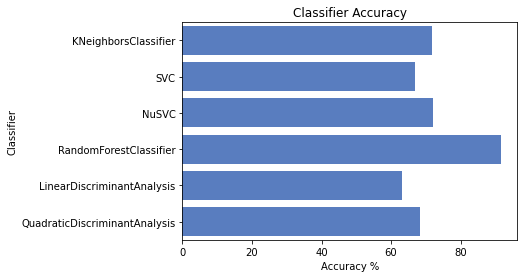

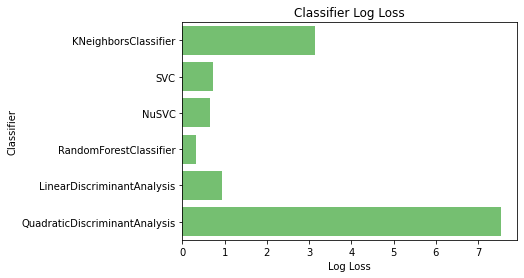

In [18]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [370]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

In [23]:

pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, data_, label, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())

Accuracy for XGBoost Classifier :  1.0


# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [21]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [26]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

(2132, 2547)

* 阈值为0.005

In [48]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [49]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

(2132, 27)

In [50]:
RFC_.fit(x,y).feature_importances_

array([0.04776431, 0.        , 0.00700813, ..., 0.        , 0.        ,
       0.        ])

In [51]:
(RFC_.fit(x,y).feature_importances_).max()

0.08274490047641901

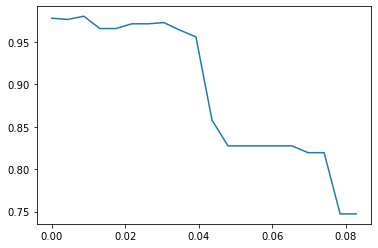

In [31]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [32]:
threshold

array([0.        , 0.00435499, 0.00870999, 0.01306498, 0.01741998,
       0.02177497, 0.02612997, 0.03048496, 0.03483996, 0.03919495,
       0.04354995, 0.04790494, 0.05225994, 0.05661493, 0.06096993,
       0.06532492, 0.06967992, 0.07403491, 0.07838991, 0.0827449 ])

In [33]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [34]:
x_embedded.shape

(2132, 22)

In [35]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9803003815241172

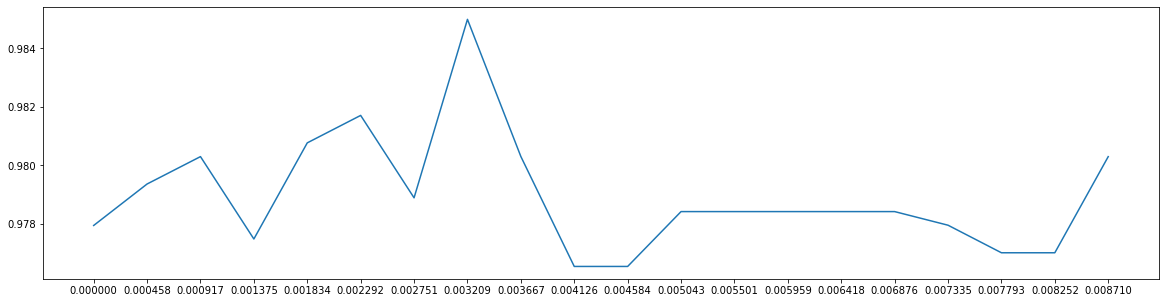

In [36]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [37]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [38]:
x_embedded.shape

(2132, 37)

In [39]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9849897197392001

In [40]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

0.9845224351573924

* 阈值为0.001

In [41]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [42]:
x_embedded.shape

(2132, 85)

In [52]:
RFC_.fit(x,y).feature_importances_

array([0.04776431, 0.        , 0.00700813, ..., 0.        , 0.        ,
       0.        ])

In [53]:
(RFC_.fit(x,y).feature_importances_).max()

0.08274490047641901

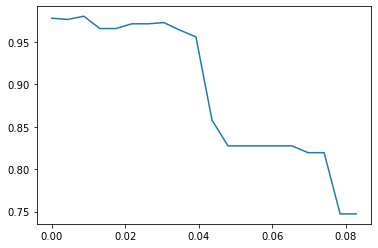

In [54]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [55]:
threshold

array([0.        , 0.00435499, 0.00870999, 0.01306498, 0.01741998,
       0.02177497, 0.02612997, 0.03048496, 0.03483996, 0.03919495,
       0.04354995, 0.04790494, 0.05225994, 0.05661493, 0.06096993,
       0.06532492, 0.06967992, 0.07403491, 0.07838991, 0.0827449 ])

# Wrapper包装法

In [62]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [63]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

22

In [64]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

array([502, 499, 492, ..., 480, 481, 482])

In [65]:
x_wrapper = selector.transform(x)

In [66]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.979362513881101

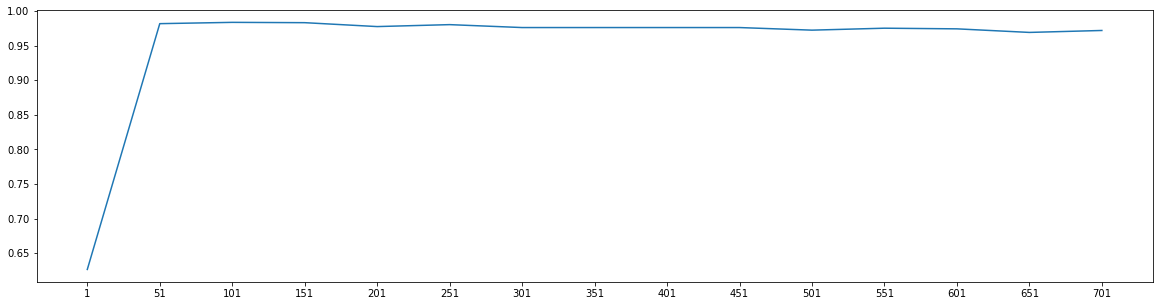

In [68]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()